# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.stats.stats import pearsonr

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


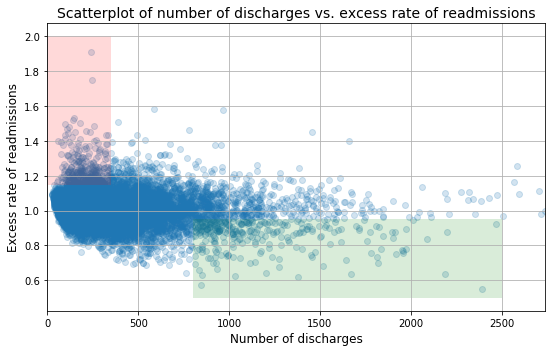

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendations completely as the analysis <br>
is based on just one visualization (scatter-plot). <br>

<b> What I like about the analysis </b>
1. The analysis correctly took out the rows with no information in Number of Discharges field during Data Wrangling <br>
2. The scatter plot reveals the relationships between number of discharges and rate of readmission. <br>


<b> What I don't like about the analysis </b> <br>
1. The Analysis does not check the statistical significance of the assertion (assertion: Does <br>
   the number of discharges (OR size of hospital) influence the rate of readmission) <br>
2. The analysis provides few conclusions based on number of discharges ( > 100, > 1000), however these points <br>
   are never shown on the analysis.


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test. <br>
2. Compute and report the observed significance value (or p-value). <br>
3. Report statistical significance for  αα  = .01. <br>
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? <br>
5. Look at the scatterplot above. <br>
6. What are the advantages and disadvantages of using this plot to convey information? <br>
7. Construct another plot that conveys the same information in a more direct manner <br>

## 1. Setup an appropriate hypothesis test.
For our analysis, we will divide the number of discharges in two categories <br>
No of discharges <= 100 : Small Hospitals <br>
No of discharges > 100 : Large Hospitals <br>
Excess Readmission Rate: ERR

<b> Null Hypothesis </b> : The distribution of ERR is same between small and large hospitals. <br>
<b> Alternate Hypothesis </b>: The distribution of ERR for small and large hospitals are different.  <br>  

In [5]:
print(len(hospital_read_df))
print(hospital_read_df.info())

16860
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB
None


In [6]:
hospital_read_df['Number of Discharges'].value_counts().head()

Not Available    5282
0                  81
172                45
111                40
137                39
Name: Number of Discharges, dtype: int64

From the above analysis, it is evident that the Number of Discharge field <br>
does not have information for 5282 entries. Similarly, the Excess Readmission Ratio <br>
field has many nulls as shown above. We will have to wrangle these columns accordingly. <br>

In [7]:
df=hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]

# Drop rows that are missing Discharge information
df=df[df['Number of Discharges']!='Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Dropping nulls from the Excess Readmission Ratio field 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB
None


In [8]:
large_hospitals=df[df['Number of Discharges']>100]
small_hospitals=df[df['Number of Discharges']<=100]
large_hospital_mean=np.mean(large_hospitals['Number of Discharges'])
small_hospital_mean=np.mean(small_hospitals['Number of Discharges'])

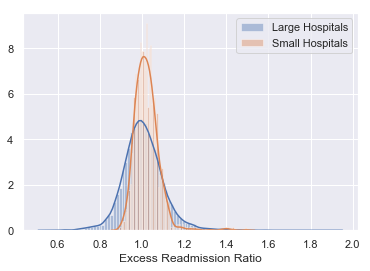

In [9]:
# Draw Probability Distribution Functions

import seaborn as sns
sns.set()
sns.distplot(large_hospitals['Excess Readmission Ratio'], label="Large Hospitals", bins=100)
sns.distplot(small_hospitals['Excess Readmission Ratio'], label="Small Hospitals",bins=100)
plt.legend()

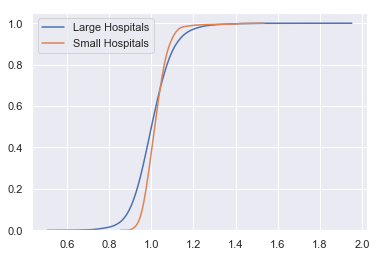

In [10]:
# Draw CDFs
sns.kdeplot(large_hospitals['Excess Readmission Ratio'], label="Large Hospitals",cumulative=True)
sns.kdeplot(small_hospitals['Excess Readmission Ratio'], label="Small Hospitals",cumulative=True)
plt.legend()

<b> Preliminary Analysis </b>
The above figures suggest that the excess readmission ratio for big hospitals follow <br>
a normal distribution with a longer tail (few hospitals with high readmission ratio). <br>
Similarly, the excess readmission ratio for small hospitals also follow a normal distribution. <br>
The range of excess readmission ratio for large hospitals appears narrower compared with that <br>
of small hospitals.

## 2.Compute and report the observed significance value (or p-value). 
<b> Null Hypothesis </b> : The distribution of ERR is same between small and large hospitals. <br>
<b> Alternate Hypothesis </b>: The distribution of ERR for small and large hospitals are different.  <br> 

In [11]:
# Bootstrap Approach
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Find mean difference from data
diff_mean_err = diff_of_means(large_hospitals['Excess Readmission Ratio'], small_hospitals['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large_hospitals['Excess Readmission Ratio'], small_hospitals['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large_hospital = both_perm[:len(large_hospitals)]
    perm_small_hospital = both_perm[len(large_hospitals):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large_hospital, perm_small_hospital)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_mean_err)) / len(perm_replicates)

print('Actual Difference between means',diff_mean_err)
print('p-value:',p_value)


Actual Difference between means -0.01632073298728476
p-value: 0.0


In [12]:
# Frequentist Approach
import scipy.stats as stats
z = diff_mean_err/ np.sqrt((large_hospitals['Excess Readmission Ratio'].std()**2)/len(large_hospitals) + (small_hospitals['Excess Readmission Ratio'].std()**2)/len(small_hospitals))
print(z)
p_value=stats.norm.cdf(z)*2
print(p_value)

-8.549039787762565
1.2411672935622867e-17


<b>Another way to look at the problem <b>
<b>Null Hypothesis</b>: The excess readmission ratio is not correlated with the number of discharges.
<b>Alternate Hypothesis</b>: There is correlation between the excess readmission ration and the number of discharges.

In [13]:
r,p = pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio'])
print('Pearson\'s correlation coefficient: ', r)
print('p value: ', p)

Pearson's correlation coefficient:  -0.09739794351079355
p value:  1.222547377680967e-25


In [15]:
# Finding the pearson coefficient between the fields: number of discharges and ERR
# r = np.corrcoef(df['Number of Discharges'],df['Excess Readmission Ratio'])[0,1]
# print('The Pearson Correlation Coefficient is', r)

<b>Conclusion</b>
As the p value from pearsonr is very close to zero, we can reject the null hypothesis <br>
and accept that there is correlation between the excess readmission ratio and the number of discharges. <br>

## 3. Report statistical significance for  α  = .01.

From the Bootstrap Approach and Freqentist Approach, we find that the p value is very close to 0. <br> 
For alpha=0.01, we can reject the null hypothesis and conclude that the distribution of <br>
excess readmission ratios in small and large hospitals differ. <br>
The pearson correlation co-efficient between the columns 'Number of Discharges' and 'Excess Readmission Ratio' <br>
is 0.09, stating a weak correlation between them.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? 

Based on our analysis. we find the difference in mean of excess readmission ratio <br>
between small and large hospitals is 0.16. The smaller hospitals have higher ERR. <br>
Though, the mean ERR between large hospitals and small hospitals is statistically significant with alpha=0.01, <br>
the pearson co-efficient between Number of Discharges and ERR is 0.09. Hence, there is a weak correlation <br>
between number of discharges and ERR leading to a low practical significance. <br>
So, we will recommend our client not to spend any extra resources in small hospitals trying to bring the ERR down. <br>


## 5. Look at the scatterplot above. <br>
## 6. What are the advantages and disadvantages of using this plot to convey information? <br>

<b> Advantages </b>
1. The scatter plot mentions each data point in the dataset, making the trend available visually.

<b> disadvantages  </b>
1. The plot did not include any p-value or pearson-coefficient.
2. The 3 large hospitals are very near to the edge of the graph. Better scales should have been chosen. 
3. The significance of the red and blue regions are not related to the conclusions drawn (<100, <1000)

## 7. Construct another plot that conveys the same information in a more direct manner <br>

We can draw a joint plot with  pearson correlation coefficient and p-value so that <br>
effective conclusions can be drawn from the chart. <br>

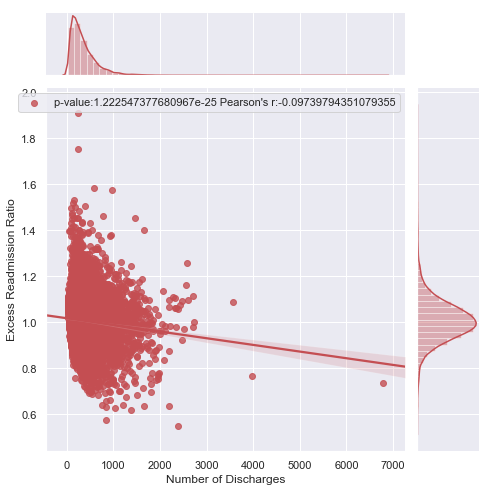

In [16]:
sns.set(style="darkgrid", color_codes=True)
r, p = stats.pearsonr(df['Number of Discharges'],df['Excess Readmission Ratio'])
j=sns.jointplot('Number of Discharges', 'Excess Readmission Ratio',data=df,kind='reg',color='r',\
                height=7, label='p-value:'+ str(p) +' Pearson\'s r:'+ str(r))
plt.legend()
#plt.show()